<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/augmented_reality/101/opencv_generate_aruco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-generate-aruco/opencv-generate-aruco.zip
!unzip -qq opencv-generate-aruco.zip
%cd opencv-generate-aruco

--2022-06-03 06:03:10--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-generate-aruco/opencv-generate-aruco.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.216.201
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.216.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3899 (3.8K) [application/zip]
Saving to: ‘opencv-generate-aruco.zip’

opencv-generate-aru 100%[===================>]   3.81K  --.-KB/s    in 0s      

2022-06-03 06:03:11 (121 MB/s) - ‘opencv-generate-aruco.zip’ saved [3899/3899]

/content/opencv-generate-aruco


In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
# 	help="path to output image containing ArUCo tag")
# ap.add_argument("-i", "--id", type=int, required=True,
# 	help="ID of ArUCo tag to generate")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to generate")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"output": "tags/DICT_5X5_100_id24.png",
    "id": 24,
    "type": "DICT_ARUCO_ORIGINAL",
}

In [5]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [6]:
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# load the ArUCo dictionary
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])

[INFO] generating ArUCo tag type 'DICT_ARUCO_ORIGINAL' with ID '24'


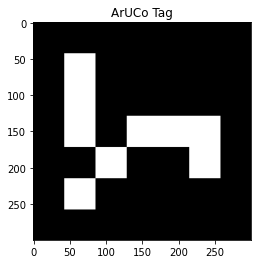

In [7]:
# allocate memory for the output ArUCo tag and then draw the ArUCo
# tag on the output image
print("[INFO] generating ArUCo tag type '{}' with ID '{}'".format(
	args["type"], args["id"]))
tag = np.zeros((300, 300, 1), dtype="uint8")
cv2.aruco.drawMarker(arucoDict, args["id"], 300, tag, 1)

# write the generated ArUCo tag to disk and then display it to our
# screen
cv2.imwrite(args["output"], tag)
plt_imshow("ArUCo Tag", tag)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Generating ArUco markers with OpenCV and Python*](https://www.pyimagesearch.com/2020/12/14/generating-aruco-markers-with-opencv-and-python/) blog post published on 12-14-20.